In [18]:
#Downloading the dataset
import urllib.request
import tarfile
import os
base_url = "https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/"
target_files = ["wiki_crop.tar","imdb_crop.tar"]

# Copy a network object to a local file
for file_name in target_files:
    target_file_url = base_url+"/"+file_name
    urllib.request.urlretrieve(target_file_url,file_name)
    tar = tarfile.open(file_name,"r:")      # "r:" - Open for reading exclusively without compression.
    tar.extractall(path="data-dump")
    tar.close()
    os.remove(file_name)
    

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
from utils import get_meta

db = "wiki"
#db = "imdb"
mat_path = "data/{}_crop/{}.mat".format(db, db)
full_path, dob, gender, photo_taken, face_score, second_face_score, age\
    = get_meta(mat_path, db)

In [12]:
print("#images: {}".format(len(face_score)))

#images: 62328


Text(0.5, 0, 'face score')

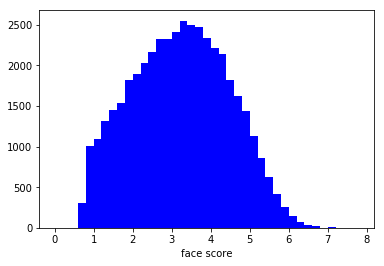

In [4]:
hist = plt.hist(face_score[face_score>0], bins=np.arange(0, 8, 0.2), color='b')
plt.xlabel("face score")

In [5]:
print("#images with second face scores: {}".format((~np.isnan(second_face_score)).sum()))

#images with second face scores: 4096


Text(0.5, 0, 'second face score')

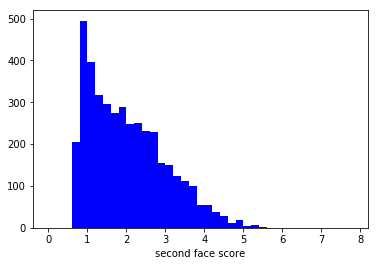

In [6]:
hist = plt.hist(second_face_score[~np.isnan(second_face_score)], bins=np.arange(0, 8, 0.2), color='b')
plt.xlabel("second face score")

In [7]:
cols, rows = 4, 3
img_num = cols * rows
path_root = "data/{}_crop/".format(db)


def show_imgs(img_paths):
    img_ids = np.random.choice(len(img_paths), img_num, replace=False)

    for i, img_id in enumerate(img_ids):
        plt.subplot(rows, cols, i + 1)
        img = cv2.imread(path_root + str(img_paths[img_id]))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
    
    plt.show()

In [8]:
img_paths = []

for i in range(len(face_score)):
    if face_score[i] < 0.0:
        img_paths.append(full_path[i][0])

print("#images with scores lower than 0.0: {}".format(len(img_paths)))

#images with scores lower than 0.0: 18016


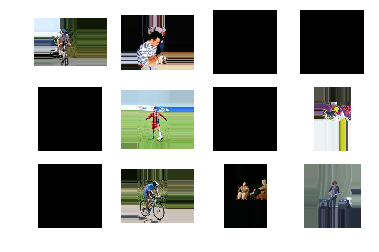

In [9]:
show_imgs(img_paths)

In [10]:
img_paths = []

for i in range(len(face_score)):
    if 0.0 < face_score[i] < 1.0:
        img_paths.append(full_path[i][0])

print("#images with scores lower than 1.0: {}".format(len(img_paths)))

#images with scores lower than 1.0: 1319


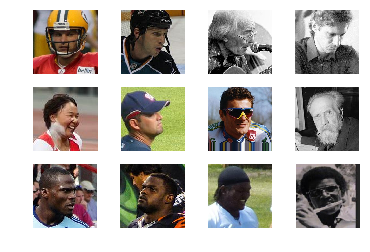

In [11]:
show_imgs(img_paths)